In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import json
import os
import sys
from matplotlib.colors import ListedColormap
from matplotlib.collections import PatchCollection
from matplotlib.patches import Ellipse

module_path = os.path.abspath(os.path.join('../'))

if module_path not in sys.path:
    sys.path.append(module_path)
from pyslabgrid import ball as bb
from pyslabgrid import mat as mat
from pyslabgrid import eqcat as eqc
from pyslabgrid import slabeventclassify as evc

#### Figures 1A, 1B and 1C of the manuscript

BSSA Wants All the plots in one image file.

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

In [3]:
def plot_subductionModel(ax):
    subdmod =  mat.getdict('../data/subduction_model/subduction_model.mat')
    import warnings; warnings.simplefilter('ignore')
    #%matplotlib notebook
    X = subdmod['hik']['lon_interface']
    Y = subdmod['hik']['lat_interface']
    D = subdmod['hik']['dep_interface']
    Z = np.array([[ float("nan") if np.isnan(zz) else zz for zz in z] for z in D])
    surf1 = ax.contourf(X, Y, Z, 50, cmap='plasma', alpha = 0.9, vmax=270)
    
    X = subdmod['puy']['lon_interface']
    Y = subdmod['puy']['lat_interface']
    D = subdmod['puy']['dep_interface']
    Z = np.array([[ float("nan") if np.isnan(zz) else zz for zz in z] for z in D])
    surf2 = ax.contourf(X, Y, Z, 50, cmap='plasma', alpha = 0.9, vmax=270)
    
    f = open("../subduction-model/nzborders/nzborders.json")
    border = json.load(f)
    f.close()
    ax.plot(border['lon'], border['lat'], '-',\
             linewidth= 1, color='#3776AB', zorder=4);

    ax.text(170, -41,  'Australian Plate', fontsize=25, rotation= 45)
    ax.text(169, -49,  'Pacific Plate', fontsize=25, rotation= 45)
    ax.text(175, -40,  'Hikurangi', fontsize=25,  color='w', rotation= 50)

    ax.text(165, -47.5, 'Puysegur', \
        fontsize=25,  color='w', zorder=100, rotation= 50)
    # ax.axis('off')
    ax.set_xlim([164,182])
    ax.set_ylim([-50, -34]);
    
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    
    # (x0, y0, width, height
    axins = inset_axes(ax, width="1.%", height="55%", loc='lower left',
                   bbox_to_anchor=(0.85,0.02,1,1), bbox_transform=ax.transAxes)
    
    cbar = fig.colorbar(surf1, cax =axins, shrink=0.3)
    cbar.ax.get_yaxis().labelpad = 30
    cbar.ax.set_ylabel('Depth (km)', rotation=270, fontsize=22)
    cbar.ax.tick_params(labelsize=22)
    cbar.ax.invert_yaxis() 

In [4]:
def plot_eqcatalog(ax):
    catalogues = ['NZeqcat_Rollins13042020-subd-slab.csv',
             'Grue_NZeqcat_Rollins13042020SepiShallow_subd-slab.csv',
             'Grue_NZeqcat_Rollins13042020SepiDeep-subd.csv',]

    catalogue_folder = '../catalog-work/classified_catalogs/'

    ecat = eqc.read_slabcatalogue(catalogue_folder+catalogues[0], onlyslab=True)
    lon, lat, mag, dep = ecat['lon'], ecat['lat'], ecat['mag'], ecat['dep']
    isslab, year = ecat['isslab'], ecat['year']
    
    
    
    xlon, xlat, xmag, xyear, xdep = [], [], [], [], []
    
    for x,y, m, z, iss, yr in zip(lon, lat, mag, dep, isslab, year):
        if (iss>0) & (m>=5.0) & (yr>=1900):
            xlon.append(x)
            xlat.append(y)
            xmag.append(m)
            xdep.append(z)
            xyear.append(yr)

    schema ={ 'magrange': [[5,6], [6,7], [7,8]],
          'pltsiz': [10, 100, 400],
        }

    kmag, klat, klon = np.array(xmag), np.array(xlat), np.array(xlon), 
    kyear, kdep = np.array(xyear), np.array(xdep)

    sc = ax.scatter(klon, klat, c=kdep, cmap='plasma');
    
    for magr, mkrsiz in zip(schema['magrange'], schema['pltsiz']):  
        IN = (kmag>=magr[0]) & (kmag<magr[1]) 
        strlab = 'Mw ' + str(magr[0]) +' - ' + str(magr[1])
    
        ax.scatter(klon[IN], klat[IN], s=mkrsiz, c=kdep[IN], \
                               cmap='plasma', alpha=0.7)
        ax.scatter(klon[IN], klat[IN], s=mkrsiz, facecolors='none', \
                               edgecolors='k', label= strlab,)
    
        if magr[0]>=7.0:
            for x,y,t in zip(klon[IN], klat[IN], kyear[IN]):
                if (t==1914)|(t==1938):
                    ax.text(x-1,y+0.35, str(t), fontsize = 20, \
                            bbox={'facecolor':'white','edgecolor':'none',\
                            'pad':0.5, 'alpha':0.4})
                elif (t==1947)|(t==1995)|(t==2001):
                    ax.text(x+0.3,y, str(t), fontsize = 20, \
                            bbox={'facecolor':'white','edgecolor':'none',\
                            'pad':0.5, 'alpha':0.4})
                elif (t==2016):
                     ax.text(x-1.6,y, str(t), fontsize = 20, \
                            bbox={'facecolor':'white','edgecolor':'none',\
                            'pad':0.5, 'alpha':0.4})
                else:
                    ax.text(x,y, str(t), fontsize = 20, \
                            bbox={'facecolor':'white','edgecolor':'none',\
                            'pad':0.5, 'alpha':0.4})
                
#                 if t<1900:
#                     continue
# #                     ax.text(x-0.5,y+0.5, str(t), fontsize = 20, \
# #                               bbox={'facecolor':'white','edgecolor':'none',\
# #                              'pad':0.5, 'alpha':0.4})
#                 elif t==1938:
#                     ax.text(x-1.5,y+0.9, str(t), fontsize = 20,
#                               bbox={'facecolor':'white','edgecolor':'none',\
#                                     'pad':0.5, 'alpha':0.4})
                    
#                 elif t<1930:
#                     ax.text(x-1,y+0.4, str(t), fontsize = 20,
#                               bbox={'facecolor':'white','edgecolor':'none',\
#                                     'pad':0.5, 'alpha':0.4})
#                 elif t<2002:
#                     ax.text(x-0.7,y-0.9,str(t), fontsize = 20,
#                               bbox={'facecolor':'white','edgecolor':'none',\
#                                     'pad':0.5, 'alpha':0.4})
#                 elif t<2015:
#                     ax.text(x-2,y-0.1, str(t), fontsize = 20,
#                               bbox={'facecolor':'white','edgecolor':'none',\
#                                     'pad':0.5,'alpha':0.4})
#                 else:
#                     ax.text(x-1.4,y+0.1, str(t), fontsize = 20,
#                               bbox={'facecolor':'white','edgecolor':'none',\
#                                     'pad':0.5, 'alpha':0.4})
                
  
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    
    # (x0, y0, width, height)
    axins = inset_axes(ax, width="1%", height="50%", loc='lower left',
                   bbox_to_anchor=(0.83,0.02,1,1), bbox_transform=ax.transAxes)
    
    
    cbar = fig.colorbar(sc, cax =axins, shrink=0.35)

    cbar.ax.get_yaxis().labelpad = 30
    cbar.ax.set_ylabel('Hypocentral depth (km)', rotation=270, fontsize=22)
    cbar.ax.invert_yaxis()
    cbar.ax.tick_params(labelsize=22)
    ax.legend(frameon=False, bbox_to_anchor=(0.3, 0.8), \
              loc='upper right', borderaxespad=0, fontsize=22)
    
    f = open("../subduction-model/nzborders/nzborders.json")
    border = json.load(f)
    f.close()
    ax.plot(border['lon'], border['lat'], '-',\
             linewidth= 1, color='#3776AB', zorder=4);
    
    ax.set_xlim([164,182])
    ax.set_ylim([-50, -34]);

In [5]:
def warpToMax(x, Max=360):
    return (x%Max)
# simple
def get_plotbeachballs(lons, lats, strikes, dips, rakes, width=2):
    patches_list = []
    color_list = []
    for i in range(len(lons)):
        a, collect = bb.plotbb(strikes[i],dips[i], rakes[i], \
                               xy = (lons[i], lats[i]), width=width);
        
        ellipse = Ellipse(xy=(lons[i], lats[i]), width=width+0.05, height=width+0.05, 
                        edgecolor='k', fc=None, lw=0.03)
        
        patches_list.append(ellipse)
        color_list.append('k')
        
        patches_list.append(collect[0])
       
        if (rakes[i]>45) & (rakes[i]<135):
            color_list.append('b')
        elif (rakes[i]<-45) & (rakes[i]>-135):
            color_list.append('g')
        else:
            color_list.append('r')
        
        patches_list.append(collect[1])
        color_list.append('w')

    our_cmap = ListedColormap(color_list)
    beachballs = PatchCollection(patches_list, cmap=our_cmap)
    beachballs.set_array(np.arange(len(patches_list)))
    return beachballs

In [6]:
def plot_beachballs(ax):
    import csv
    with open('../focmech-work/GeoNet_slabevents.csv', 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        slat,slon,sdep,sMw,s1,d1,r1,s2,d2,r2 = [],[],[],[],[],[],[],[],[],[]
        hik_count, puy_count = 0,0
        # 'lon,lat,dep,Mw,strike1,dip1,rake1,strike2,dip2,rake2'
        for row in csvreader:
            if float(row[2])>300:
                continue
      
            slat.append(float(row[1]))
            slon.append(float(row[0]))
            sdep.append(float(row[2]))
            sMw.append(float(row[3]))
            s1.append(float(row[4]))
            d1.append(float(row[5]))
            r1.append(float(row[6]))
            s2.append(float(row[7]))
            d2.append(float(row[8]))
            r2.append(float(row[9]))
        
        
     # sort on Mw
    sort_indx = sorted(range(len(sMw)), key=lambda k: sMw[k], reverse=True)
    sslon, sslat, ss1, dd1, rr1 = [],[],[],[],[]
    for i in sort_indx:
        sslon.append(slon[i])
        sslat.append(slat[i])
        ss1.append(s1[i])
        dd1.append(d1[i])
        rr1.append(r1[i])
    
    beachballs = get_plotbeachballs(sslon, sslat, ss1, dd1, rr1, width=0.35)

    import matplotlib.colors as colors
    subdmod =  mat.getdict('../data/subduction_model/subduction_model.mat')
    X = subdmod['hik']['lon_interface']
    Y = subdmod['hik']['lat_interface']
    Z = subdmod['hik']['dep_interface']
    cs = ax.contour(X, Y, Z, 7, cmap='plasma', alpha = 0.9, vmax=250)
    X = subdmod['puy']['lon_interface']
    Y = subdmod['puy']['lat_interface']
    Z = subdmod['puy']['dep_interface']
    ax.contour(X, Y, Z, 7, cmap='plasma', alpha = 0.9, vmax=250)

    norm= colors.Normalize(vmin=1, vmax=250)
    sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
    sm.set_array([])
    
    
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    axins = inset_axes(ax, width="1%", height="50%", loc='lower left',
                   bbox_to_anchor=(0.83,0.02,1,1), bbox_transform=ax.transAxes)

    cbar = fig.colorbar(sm, cax =axins, ticks=cs.levels, shrink =0.2)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.get_yaxis().labelpad = 30
    cbar.ax.set_ylabel('Depth contour (km)', rotation=270, fontsize=22)
    cbar.ax.tick_params(labelsize=22)
    cbar.ax.invert_yaxis()

    f = open("../subduction-model/nzborders/nzborders.json")
    border = json.load(f)
    f.close()
    ax.plot(border['lon'], border['lat'], '-',\
             linewidth= 1, color='#3776AB', zorder=4);
    ax.add_collection(beachballs)
    ax.set_xlim([164,182])
    ax.set_ylim([-50, -34]);    

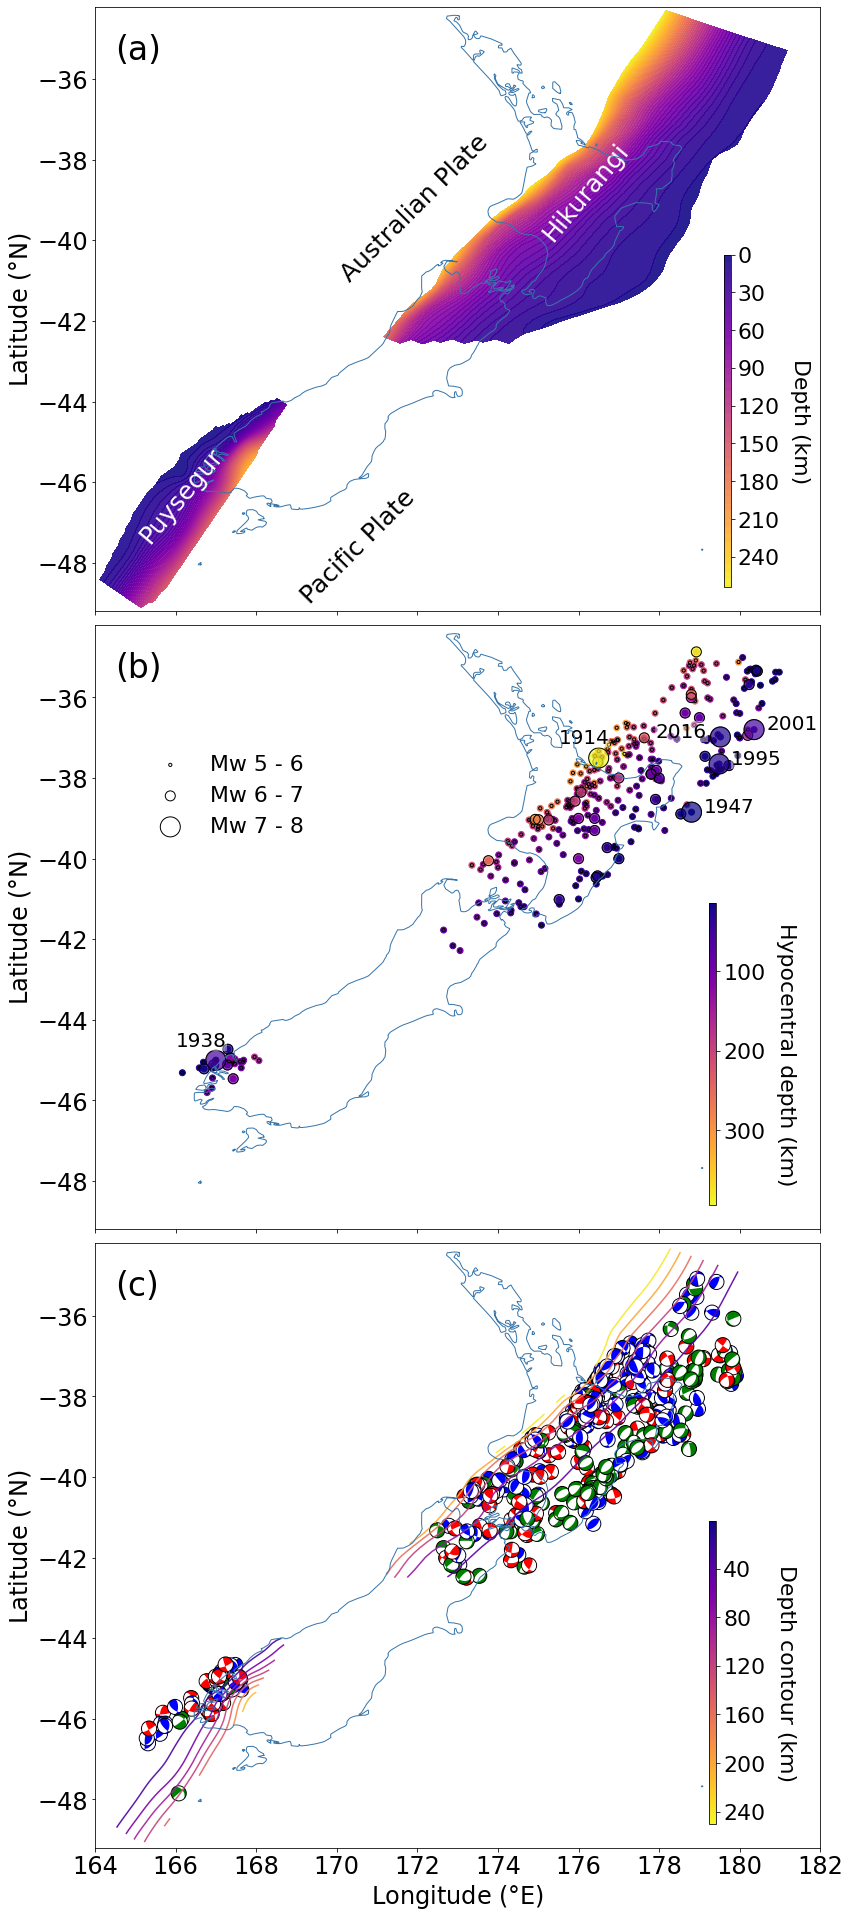

In [20]:
plt.rcParams.update({'font.size': 24})

fig, ax = plt.subplots(3,1, figsize=(13,39))
plot_subductionModel(ax[0])
ax[0].text(164.5,-35.5,'(a)', fontsize=33)
ax[0].set_ylim([-49.2, -34.2]);
#ax[0].set_xlabel('Longitude ($\xb0$E)')
ax[0].set_xticklabels([])
ax[0].set_ylabel('Latitude ($\xb0$N)')
ax[0].set_aspect('equal')
#ax[0].axis('off');
#plt.savefig('Figure1A.jpeg', dpi=300, facecolor='w')

plot_eqcatalog(ax[1])
ax[1].text(164.5,-35.5,'(b)', fontsize=33)
ax[1].set_ylim([-49.2, -34.2]);
ax[1].set_aspect('equal')
#ax[1].axis('off');
#ax[1].set_xlabel('Longitude ($\xb0$E)')
ax[1].set_xticklabels([])
ax[1].set_ylabel('Latitude ($\xb0$N)')
#plt.savefig('Figure1B.jpeg', dpi=300, facecolor='w')


plot_beachballs(ax[2])
ax[2].text(164.5,-35.5,'(c)', fontsize=33)
ax[2].set_ylim([-49.2, -34.2]);
ax[2].set_aspect('equal')
ax[2].set_xlabel('Longitude ($\xb0$E)')
ax[2].set_ylabel('Latitude ($\xb0$N)');
#fig.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=-0.3)
plt.savefig('Figure1.jpeg', dpi=300, facecolor='w')
